In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [3]:
train = tf.keras.utils.image_dataset_from_directory('./chest_xray/chest_xray/train')
test = tf.keras.utils.image_dataset_from_directory('./chest_xray/chest_xray/test')
val = tf.keras.utils.image_dataset_from_directory('./chest_xray/chest_xray/val')

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [5]:
model = Sequential()

In [6]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [7]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [8]:
logdir='logs'

In [9]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [10]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
163/163 [==============================] - 123s 742ms/step - loss: 1.7537 - accuracy: 0.9013 - val_loss: 0.4178 - val_accuracy: 0.7500
Epoch 2/20
163/163 [==============================] - 103s 626ms/step - loss: 0.1382 - accuracy: 0.9507 - val_loss: 0.6336 - val_accuracy: 0.8125
Epoch 3/20
163/163 [==============================] - 104s 633ms/step - loss: 0.0857 - accuracy: 0.9699 - val_loss: 0.8079 - val_accuracy: 0.7500
Epoch 4/20
163/163 [==============================] - 103s 624ms/step - loss: 0.1841 - accuracy: 0.9344 - val_loss: 1.8199 - val_accuracy: 0.6875
Epoch 5/20
163/163 [==============================] - 102s 621ms/step - loss: 0.0582 - accuracy: 0.9803 - val_loss: 0.7958 - val_accuracy: 0.7500
Epoch 6/20
163/163 [==============================] - 102s 620ms/step - loss: 0.0435 - accuracy: 0.9854 - val_loss: 1.6271 - val_accuracy: 0.6875
Epoch 7/20
163/163 [==============================] - 103s 626ms/step - loss: 0.0187 - accuracy: 0.9941 - val_loss: 1.2204 -

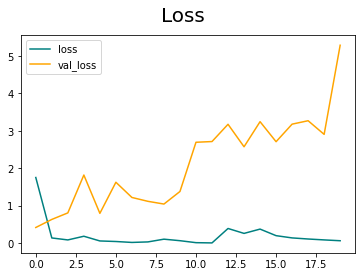

In [11]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

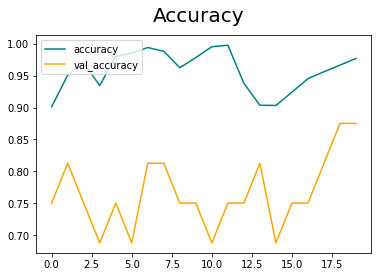

In [12]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [13]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [14]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [15]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 132ms/step


In [16]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.7450593, shape=(), dtype=float32) tf.Tensor(0.96666664, shape=(), dtype=float32) tf.Tensor(0.7724359, shape=(), dtype=float32)


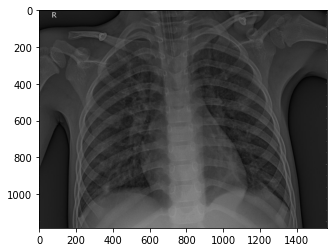

In [30]:
img = cv2.imread('person14_virus_44.jpeg')
plt.imshow(img)
plt.show()

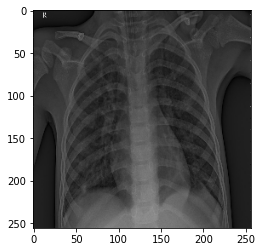

In [31]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [32]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [33]:
yhat

array([[0.645924]], dtype=float32)

In [35]:
if yhat > 0.5: 
    print(f'Predicted class has pneumonia')
else:
    print(f'Predicted class does not have pneumonia')

Predicted class has pneumonia


In [36]:
from tensorflow.keras.models import load_model

In [37]:
model.save('imageclassifierbetter.h5')

In [38]:
new_model = load_model('imageclassifierbetter.h5')

In [39]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 59ms/step


array([[0.645924]], dtype=float32)